In [8]:
import sys
sys.path.append("/home/ekc395/.local/lib/python3.12/site-packages")

In [9]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [17]:
fireData = pd.read_csv("cleanedCAFire.csv", index_col = "_id", low_memory = False)
fireData

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,Zip Code,* CAL FIRE Unit,County,* Incident Name,...,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Fire Name (Secondary),GLOBALID,Latitude,Longitude,x,y
_id,,,,,,,,,,,,,,,,,,,,,
1,1,No Damage,8376.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
2,2,Affected (1-9%),8402.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,No Patio Cover/Carport,Combustible,NaN,NaN,Quail,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
3,3,No Damage,8430.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
4,4,No Damage,3838.0,Putah Creek,Road,Winters,NaN,LNU,Solano,Quail,...,Combustible,No Fence,NaN,NaN,Quail,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
5,5,No Damage,3830.0,Putah Creek,Road,Winters,NaN,LNU,Solano,Quail,...,Combustible,No Fence,NaN,NaN,Quail,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100226,101217,No Damage,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,Non Combustible,No Fence,NaN,NaN,NaN,1b537de2-8b97-43ee-9d5c-c5a426f604f1,34.033408,-118.700625,-1.321369e+07,4.033289e+06
100227,101218,No Damage,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,No Patio Cover/Carport,No Fence,NaN,NaN,NaN,56e3cc8b-4bf0-4beb-bd26-b54422cc31ee,34.033278,-118.700902,-1.321372e+07,4.033271e+06
100228,101219,No Damage,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,Unknown,Unknown,NaN,NaN,NaN,f85e9f02-a67f-4a7d-9fa1-0b8bf419d51a,34.033618,-118.701102,-1.321375e+07,4.033317e+06


In [20]:
fireData_grouped = fireData.groupby(["* CAL FIRE Unit"]).size().reset_index(name = "Incident Count")
fireData_grouped = fireData_grouped.sort_values(by = "Incident Count", ascending = False)

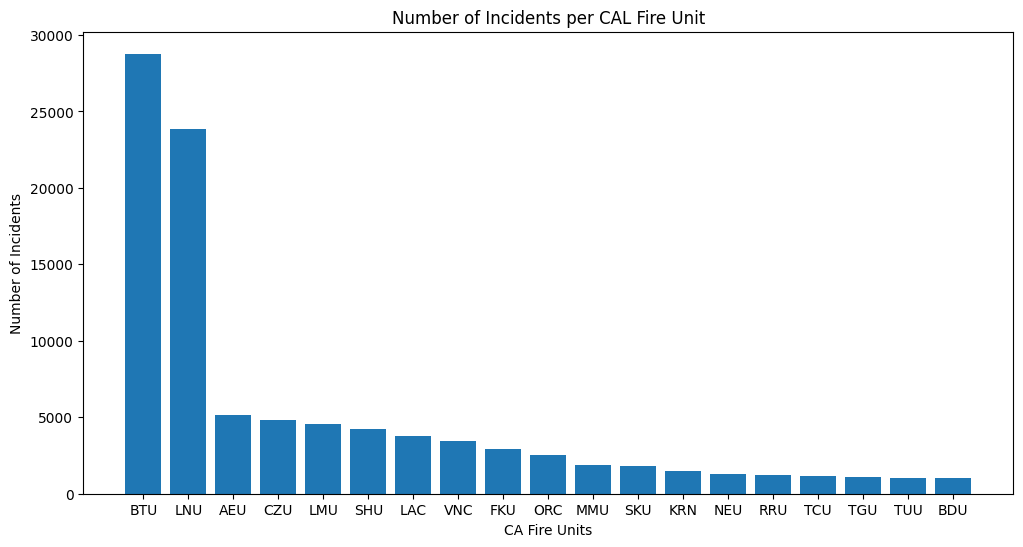

In [24]:
fireData_filtered = fireData_grouped[fireData_grouped["Incident Count"] > 1000]
units = fireData_filtered["* CAL FIRE Unit"]
incident_counts = fireData_filtered["Incident Count"]

plt.figure(figsize = (12, 6))
plt.bar(units, incident_counts)
plt.xlabel("CA Fire Units")
plt.ylabel("Number of Incidents")
plt.title("Number of Incidents per CAL Fire Unit")
plt.show()